In [1]:
import pandas as pd
import datetime as dt

from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from yaml.loader import SafeLoader
from yaml import load

from transformers import pipeline

/mnt/c/Users/Naruhiko/OneDrive/Documentos/Programação/reddit-chatgpt-bot/chatgpt_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-02 14:39:21.782362: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-02 14:39:23.073159: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-02 14:39:23.076829: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 14:39:29.126674: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [2]:
posts_df = pd.read_csv('data/ds_ml_ai_reddit_posts.csv')
comments_df = pd.read_csv("data/ds_ml_ai_reddit_comments.csv")

In [3]:
posts_df.head()

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7796,186,0.99
1,kuc6tz,MachineLearning,1.610275e+09,NaN,https://v.redd.it/25nxi9ojfha61,[D] A Demo from 1993 of 32-year-old Yann LeCun...,Discussion,5843,133,0.98
2,g7nfvb,MachineLearning,1.587789e+09,NaN,https://v.redd.it/rlmmjm1q5wu41,[R] First Order Motion Model applied to animat...,Research,4763,111,0.97
3,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97
4,ohxnts,MachineLearning,1.625977e+09,NaN,https://i.redd.it/34sgziebfia71.jpg,[D] This AI reveals how much time politicians ...,Discussion,4576,228,0.96


In [4]:
posts_df['created_date'] = posts_df['created_utc'].apply(lambda x: dt.datetime.fromtimestamp(x))
posts_df['created_year'] = posts_df['created_date'].dt.year

In [5]:
posts_df.head()

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year
0,gh1dj9,MachineLearning,1.589117e+09,NaN,https://v.redd.it/v492uoheuxx41,[Project] From books to presentations in 10s w...,Project,7796,186,0.99,2020-05-10 10:19:54,2020
1,kuc6tz,MachineLearning,1.610275e+09,NaN,https://v.redd.it/25nxi9ojfha61,[D] A Demo from 1993 of 32-year-old Yann LeCun...,Discussion,5843,133,0.98,2021-01-10 07:30:36,2021
2,g7nfvb,MachineLearning,1.587789e+09,NaN,https://v.redd.it/rlmmjm1q5wu41,[R] First Order Motion Model applied to animat...,Research,4763,111,0.97,2020-04-25 01:27:23,2020
3,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021
4,ohxnts,MachineLearning,1.625977e+09,NaN,https://i.redd.it/34sgziebfia71.jpg,[D] This AI reveals how much time politicians ...,Discussion,4576,228,0.96,2021-07-11 01:18:59,2021


In [6]:
comments_posts_df = posts_df.merge(comments_df, on = 'post_id', how = 'left')

comments_posts_df = comments_posts_df[~comments_posts_df['comment'].isnull()]

## EDA

In [50]:
# Fazer eda depois

## Wordcloud

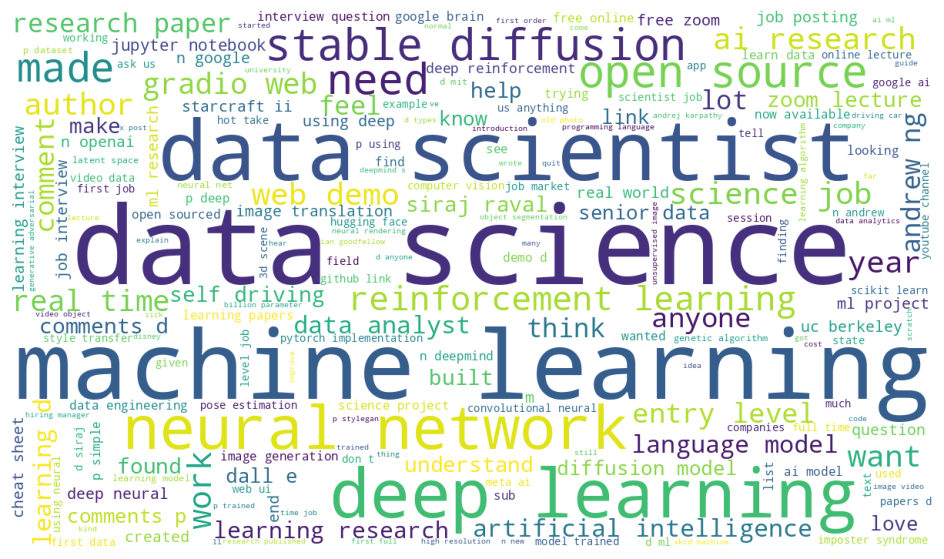

In [7]:
post_title_text = " ".join([title for title in posts_df['post_title'].str.lower()])

word_cloud = WordCloud(collocation_threshold=2, width=1200, height=700,
                       background_color='white').generate(post_title_text)

plt.figure(figsize=(12,7))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [52]:
# Build word cloud by year interactively

## Sentiment analysis

In [8]:
sentiment_classifier = pipeline(model="finiteautomata/bertweet-base-sentiment-analysis")

2023-04-02 14:42:15.183006: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:982] could not open file to read NUMA node: /sys/bus/pci/devices/0000:08:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-04-02 14:42:15.184324: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at finiteautomata/bertweet-base-sentiment-analysis.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassif

In [9]:
def get_sentiment(text):
    # get sentiment prediciont socres
    try:
        sentiment = sentiment_classifier(text)[0]['label']
    except:
        sentiment = 'Not classified'
    
    return sentiment

In [10]:
comments_posts_df_sub = comments_posts_df[comments_posts_df['post_title'].str.contains('AI')]
comments_posts_df_sub.head()

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment
431,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,This seems like the next museum gimmick where ...
432,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,Alan Turing
433,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,Does that mean we're supposed to find and shar...
434,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,I used some photos of my father and I'm speech...
435,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,[cursed_cristiano_ronaldo_statue.mp4](https://...


In [11]:
get_sentiment('I love you')

'POS'

In [12]:
comments_posts_df_sub['sentiment'] = comments_posts_df_sub['comment'].astype(str).apply(lambda x: get_sentiment(x))

Token indices sequence length is longer than the specified maximum sequence length for this model (270 > 128). Running this sequence through the model will result in indexing errors
/tmp/ipykernel_3861/3455420292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_posts_df_sub['sentiment'] = comments_posts_df_sub['comment'].astype(str).apply(lambda x: get_sentiment(x))


In [13]:
comments_posts_df_sub.sample(5)

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment,sentiment
97369,11okrni,MachineLearning,1.678543e+09,NaN,https://i.redd.it/7muze2s684na1.png,[Discussion] Compare OpenAI and SentenceTransf...,Discussion,501,50,0.94,2023-03-11 10:54:22,2023,"""words to numbers"" is the secret sauce of all ...",Not classified
66600,dkcspv,MachineLearning,1.571534e+09,https://twitter.com/SchoolOfAIOffic/status/118...,https://www.reddit.com/r/MachineLearning/comme...,"[N] School of AI, founded by Siraj Raval, seve...",News,654,179,0.95,2019-10-19 22:14:16,2019,"Just consider that the ""school of ai"" is run m...",NEG
44081,om7kq3,MachineLearning,1.626540e+09,NaN,https://spectrum.ieee.org/the-institute/ieee-m...,"[N] Stop Calling Everything AI, Machine-Learni...",News,831,145,0.95,2021-07-17 13:31:54,2021,"Exactly, what i dont understand is how i've se...",NEG
42001,gfnax4,datascience,1.588917e+09,This is going to come off as salty. I think it...,https://www.reddit.com/r/datascience/comments/...,"I'm sick of ""AI Influencers"" - especially ones...",Networking,855,333,0.96,2020-05-08 02:44:54,2020,>Maybe consider what's the root cause of you b...,Not classified
563,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,[https://youtu.be/lhNNrhze3vs?t=83](https://yo...,NEU


In [14]:
from lets_plot import *
from lets_plot.mapping import *

In [15]:
LetsPlot.setup_html()

ggplot(comments_posts_df_sub) \
    + geom_pie(aes(fill = as_discrete('sentiment')),
               size = 30, hole = 0.2, stroke = 1.0,
               labels = layer_labels()
                        .line('@sentiment')
                        .line('(@{..prop..})')
                        .format('..prop..', '.0%')) \
    + theme(line = element_blank(),
            axis_text = element_blank(),
            axis_title = element_blank(),
            legend_position = 'none') \
    + ggtitle('Sentiment of around the topic')


In [16]:
comments_posts_df_sub['sentiment'].value_counts()

NEU               9173
NEG               5161
POS               2617
Not classified    2512
Name: sentiment, dtype: int64

## Emotion recognition

In [17]:
emotion_classifier = pipeline('text-classification', model='bhadresh-savani/distilbert-base-uncased-emotion', return_all_scores = True)

Some layers from the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion were not used when initializing TFDistilBertForSequenceClassification: ['dropout_19']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at bhadresh-savani/distilbert-base-uncased-emotion and are newly initialized: ['dropout_57']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/mnt/c/Users

In [18]:
emotion_classifier("Ice cream is delicious")

[[{'label': 'sadness', 'score': 0.0002589895448181778},
  {'label': 'joy', 'score': 0.9985546469688416},
  {'label': 'love', 'score': 0.000635119853541255},
  {'label': 'anger', 'score': 0.00018885225290432572},
  {'label': 'fear', 'score': 0.00014140900748316199},
  {'label': 'surprise', 'score': 0.00022095012536738068}]]

In [19]:
def get_emotion(text):
    try:
        pred_scores = emotion_classifier(text)

        emotion = max(pred_scores[0], key = lambda x: x['score'])['label']
    
    except:
        emotion = 'not defined'

    return emotion

In [20]:
comments_posts_df_sub['emotion'] = comments_posts_df_sub['comment'].astype('str').apply(lambda x: get_emotion(x))

Token indices sequence length is longer than the specified maximum sequence length for this model (612 > 512). Running this sequence through the model will result in indexing errors
/tmp/ipykernel_3861/3299503040.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comments_posts_df_sub['emotion'] = comments_posts_df_sub['comment'].astype('str').apply(lambda x: get_emotion(x))


In [21]:
comments_posts_df_sub.head()

,post_id,subreddit,created_utc,selftext,post_url,post_title,link_flair_text,score,num_comments,upvote_ratio,created_date,created_year,comment,sentiment,emotion
431,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,This seems like the next museum gimmick where ...,NEG,joy
432,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,Alan Turing,NEU,joy
433,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,Does that mean we're supposed to find and shar...,NEG,anger
434,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,I used some photos of my father and I'm speech...,POS,sadness
435,lui92h,MachineLearning,1.614525e+09,NaN,https://v.redd.it/ikd5gjlbi8k61,[N] AI can turn old photos into moving Images ...,News,4689,230,0.97,2021-02-28 12:12:28,2021,[cursed_cristiano_ronaldo_statue.mp4](https://...,NEU,anger


In [22]:
#Fazer analise exploratória desses dados depois

## Building Ask Me Anything chatbot with ChatGPT API

In [23]:
from gpt_index import SimpleDirectoryReader, GPTSimpleVectorIndex, LLMPredictor, PromptHelper, ServiceContext
from langchain.chat_models import ChatOpenAI
import os
from IPython.display import Markdown, display

In [24]:
comments_posts_df_tmp = comments_posts_df[['post_title', 'selftext', 'comment']].astype(str)
agg_comments = comments_posts_df_tmp.groupby(['post_title', 'selftext'])['comment'].apply('. '.join).reset_index()

In [25]:
agg_comments

,post_title,selftext,comment
0,"""Do I need to know {insert advanced math} to g...","These posts occur with some regularity, and {i...",">These posts occur with some regularity, and {..."
1,"""Humans can decipher adversarial images"": A st...",nan,(spends a 100 years teaching computers to thin...
2,"""Hyperparameter Optimisation"" is the ultimate ...",I have found that this term impresses non-tech...,so you work for someone strict enough where yo...
3,"""I'm gonna make him a Neural Network he can't ...",nan,"To visualise 14-dimensional space, first visua..."
4,"""If you torture the data long enough, it will ...",nan,"Just teach me how to torture data like that, s..."
...,...,...,...
1487,£19.91/hr for a PhD Data scientist 😭😂😂,nan,UK moment. This is a strong indicator that the...
1488,“I would like to nominate CNN for the worst da...,nan,I feel like the major news outlets constantly ...
1489,"“If you torture the data long enough, it will ...",nan,From now on I will start each presentation for...
1490,🍪🍪🍪 [OC],nan,r/ComedyCemetery. [deleted]. Correct! And if d...


In [26]:
agg_comments['combined_text'] = agg_comments.astype(str).agg('. '.join, axis=1)
all_text = ' '.join(agg_comments['combined_text'])

In [27]:
with open('textdata/all_text_reddit.txt', 'w') as f:
    f.write(all_text)

In [35]:
# https://www.lennysnewsletter.com/p/i-built-a-lenny-chatbot-using-gpt

def construct_index(directory_path):
    # set max input size
    max_input_size = 4096

    # set number of output tokens
    num_outputs = 256

    # set maximum chunk overlap
    max_chunk_overlap = 20

    #set chunk size limit
    chunk_size_limit = 600

    # define LLM (ChatGPT gpt-3.5-turbo)
    llm_predictor = LLMPredictor(llm = ChatOpenAI(temperature=0, model_name='gpt-3.5-turbo', max_tokens=num_outputs))
    prompt_helper = PromptHelper(max_input_size, num_outputs, max_chunk_overlap, chunk_size_limit=chunk_size_limit)

    service_context = ServiceContext.from_defaults(llm_predictor=llm_predictor, prompt_helper=prompt_helper)

    documents = SimpleDirectoryReader(directory_path).load_data()

    index = GPTSimpleVectorIndex.from_documents(
        documents, service_context=service_context
    )

    index.save_to_disk('index.json')

    return index

In [36]:
def ask_me_anythink(question):

    index = GPTSimpleVectorIndex.load_from_disk('index.json')
    response = index.query(question, response_mode = 'compact')

    display(Markdown(f"You asked: <b>{question}</b>"))
    display(Markdown(f"Bot says: <b>{response.response}</b>"))

In [37]:
with open('config.yaml') as f:
    config = load(f, SafeLoader)

In [38]:
os.environ['OPENAI_API_KEY'] = config['openai']['api_key']

In [39]:
construct_index('textdata')

INFO:gpt_index.token_counter.token_counter:> [build_index_from_nodes] Total LLM token usage: 0 tokens
INFO:gpt_index.token_counter.token_counter:> [build_index_from_nodes] Total embedding token usage: 10390003 tokens


In [40]:
ask_me_anythink('How to learn data science?')

INFO:gpt_index.token_counter.token_counter:> [query] Total LLM token usage: 4176 tokens
INFO:gpt_index.token_counter.token_counter:> [query] Total embedding token usage: 6 tokens


You asked: <b>How to learn data science?</b>

Bot says: <b>

The best way to learn data science is to gain as much experience as possible. This can be done by engaging with local data science conferences and communities, attending Kaggle days conferences, reading books such as Analytics at Work and Clean Code, and participating in meaningful open source projects. Additionally, it is important to understand the business objectives of the data and to focus on delivering successful pilots and proofs of concept. It is also important to keep a keen eye on the project you are scoped and read up on what makes a viable, impactful DS deliverable. Pressure testing assumptions on what end users need and will actually use is critical to making something that will be used beyond your local notebook. Finally, it is important to build relationships with software engineers and other data scientists to learn best practices and to understand the tools and processes of deploying code. Additionally, it is beneficial to find the other data scientists at your company and talk to them to gain insight into the industry.</b>